In [1]:
%cd '/content/drive/MyDrive/Tensorflow/SceneryClassifier'

/content/drive/MyDrive/Tensorflow/SceneryClassifier


# About Dataset
This data is taken from Intel Image Classification Dataset from Kaggle
link => https://www.kaggle.com/datasets/puneet6060/intel-image-classification

Dataset contains images from 6 different classes..
1. Builidings
2. Forest
3. Glacier
4. Mountain
5. Sea
6. Street

There are about 2300 training images of each classes and about 500 test images of each classes

Total Training Images: 14034

Total Testing Images: 3000 

## In this Notebook 📔 
1. We will take 1000 images from each training classes
and 300 from test images for each classes.
2. I have already converted these images to four numpy arrays..
* training_images </br>
* training_labels</br>
* testing_images</br>
* testing_lables</br>

3. We will preprocess the data such as encoding labels, scaling images and shuffling..
4. then, Train simple convolution neural network with 
5 Convolutional Layer and Adam optimizer and model our predictions.
5. We will then, train on pretrained vgg16 model with some added Dense Layers to see if we can improve our model's performance...

Note: There are some utilities function's 

1. training_graph -> Displays Loss and Accuracy Graph
2. display_random_image(images, labels, classes) -> display's random image each time rum with provided label's   


# Importing Libraries

In [56]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.utils import shuffle
import seaborn as sns

# Loading Numpy Data Array's

In [88]:
train_images = np.load('./data/train_images.npy')
train_labels = np.load('./data/train_labels.npy')
test_images = np.load('./data/test_images.npy')
test_labels = np.load('./data/test_labels.npy')

In [67]:
# Utilities Function's

def display_random_image(images, labels):
  index = random.randint(0,len(images))
  plt.imshow(images[index])
  plt.title(str(index)+'# '+labels[index])

# Visualising Model Predictions on random image 
def display_prediction_image(images, labels, classes):
  ind = random.randint(0, len(labels))
  plt.imshow(images[ind])
  plt.title(classes[np.argmax(labels[ind])])

# Plot's Accuracy and Loss of Model
def training_graph(history):
  # Accuracy Plot
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

  # Loss Plot
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

def training(model, train_images, train_labels, test_images, test_labels, batch_size=32, epochs=10, callback=None):
  # Fitting Model
  history = model.fit(
    train_images,
    train_labels, 
    batch_size=batch_size, 
    epochs=epochs, 
    validation_split=0.3, 
    callbacks=callback, 
    verbose=1
  )
  
  training_graph(history)
  # Accuracy
  _, accuracy = model.evaluate(test_images, test_labels, batch_size=batch_size)
  predictions = model.predict(test_images)
  return accuracy, predictions

Shapes of Data

train_images shape:  (6000, 150, 150, 3)
train_labels shape:  (6000,)
test_images shape:  (1800, 150, 150, 3)
test_labels shape:  (1800,)

Image Shape:  (150, 150)
No of Classes:  6
Classes:  ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


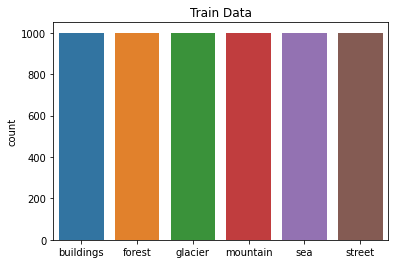

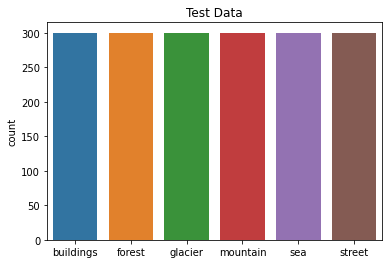

In [59]:
# About Dataset
print('Shapes of Data\n')
print('train_images shape: ', train_images.shape)
print('train_labels shape: ', train_labels.shape)
print('test_images shape: ', test_images.shape)
print('test_labels shape: ', test_labels.shape)
print('\nImage Shape: ', train_images.shape[1:3])

classes = np.unique(train_labels).tolist()
print('No of Classes: ', len(classes))
print('Classes: ', classes)

sns.countplot(x=list(train_labels))
plt.title('Train Data')
plt.show()

sns.countplot(x=list(test_labels))
plt.title('Test Data')
plt.show()

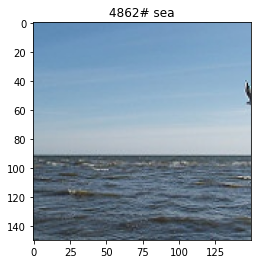

In [72]:
display_random_image(train_images, train_labels)

# Encoding Label's
* 'buildings' -> 0,  
* 'forest'-> 1,  
* 'glacier'-> 2,  
* 'mountain'-> 3,  
* 'sea'-> 4,  
* 'street'-> 5  

In [105]:
# Encoding Label's
my_dict = {i:classes.index(i) for i in classes}

if train_labels[0] in classes:
  train_labels = np.vectorize(my_dict.get)(train_labels)
  test_labels = np.vectorize(my_dict.get)(test_labels)

# Shuffling Data using keras.shuffle

In [107]:
# Shuffling Data
train_images, train_labels = shuffle(train_images, train_labels, random_state=42)
test_images, test_labels = shuffle(test_images, test_labels, random_state=42)

# Reshaping Labels array from (1800, ) to (1800, 1) 
as it is required by neural network...

In [108]:
train_labels = train_labels.reshape(-1, 1)
test_labels = test_labels.reshape(-1, 1)

In [110]:
print("New Label's shape")
print('train_labels shape: ', train_labels.shape)
print('test_labels shape: ', test_labels.shape)

New Label's shape
train_labels shape:  (6000, 1)
test_labels shape:  (1800, 1)


# Simple Convoluntion Neural Network
with following parameters

* batch_size = 32  
* epochs = 20  
* optimizer = 'Adam'  
* loss = 'sparse_categorical_crossentropy'
* metrics = 'accuracy'
* validation_split = 0.3

Epoch 1/20
132/132 [==============================] - 11s 79ms/step - loss: 1.6939 - accuracy: 0.2421 - val_loss: 1.5918 - val_accuracy: 0.4094
Epoch 2/20
132/132 [==============================] - 10s 75ms/step - loss: 1.3247 - accuracy: 0.4298 - val_loss: 1.1759 - val_accuracy: 0.5578
Epoch 3/20
132/132 [==============================] - 10s 76ms/step - loss: 1.1428 - accuracy: 0.5090 - val_loss: 1.0683 - val_accuracy: 0.5539
Epoch 4/20
132/132 [==============================] - 10s 76ms/step - loss: 1.0586 - accuracy: 0.5595 - val_loss: 0.9871 - val_accuracy: 0.5933
Epoch 5/20
132/132 [==============================] - 10s 76ms/step - loss: 1.0096 - accuracy: 0.5726 - val_loss: 0.9515 - val_accuracy: 0.6211
Epoch 6/20
132/132 [==============================] - 10s 76ms/step - loss: 0.9763 - accuracy: 0.5848 - val_loss: 0.9649 - val_accuracy: 0.6283
Epoch 7/20
132/132 [==============================] - 10s 76ms/step - loss: 0.9194 - accuracy: 0.6193 - val_loss: 0.8745 - val_accuracy:

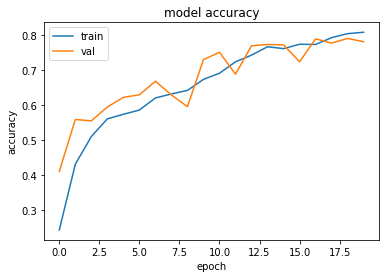

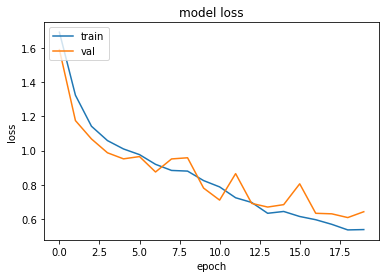

In [111]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam, SGD

inputs = keras.Input(shape=(150, 150, 3))
x = layers.Rescaling(1./255)(inputs)

x = layers.Conv2D(128, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Dropout(0.3)(x)

x = layers.Conv2D(128, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Dropout(0.3)(x)

x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Dropout(0.3)(x)

x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Dropout(0.3)(x)

x = layers.Flatten()(x)
x = layers.Dense(64, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
x = layers.Dense(32, activation='relu')(x)

outputs = layers.Dense(6, activation='softmax')(x)
model = keras.Model(inputs=inputs, outputs=outputs, name='Model_1')

optimizer = Adam(learning_rate=0.001)
#optimizer = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=20, batch_size=32, validation_split=0.3)
training_graph(history)

In [112]:
# evaluate the model
_, train_acc = model.evaluate(train_images, train_labels)
_, test_acc = model.evaluate(test_images, test_labels)
predictions = model.predict(test_images)
print('Train Accuracy : %.3f, Test Accuracy: %.3f' % (train_acc, test_acc))

57/57 [==============================] - 1s 24ms/step - loss: 0.6367 - accuracy: 0.7689
Train Accuracy : 0.831, Test Accuracy: 0.769


### *We are getting an accuracy of 77 percent accuracy on test set with simple cnn model*

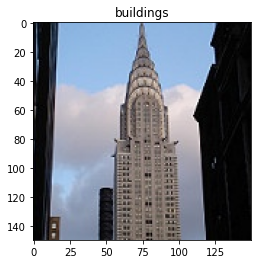

In [114]:
# Visualising Model Predictions on random image 
def random_image_predictor(images, labels, classes):
  ind = random.randint(0, len(labels))
  plt.imshow(images[ind])
  plt.title(classes[np.argmax(labels[ind])])

random_image_predictor(test_images, predictions, classes)

# Training Model on Pretrained Vgg16 Model with added Dense Layers..
with following parameters

* batch_size = 64  
* epochs = 20  
* optimizer = 'Adam'  
* loss = 'sparse_categorical_crossentropy'
* metrics = 'accuracy'
* validation_split = 0.3

In [117]:
# Using Pretrained Vgg16 Model
# Importing Vgg16 Model and Initializing
from keras.applications.vgg16 import VGG16
model = VGG16(include_top=False, weights='imagenet', input_shape = (150, 150, 3))
model.trainable=False # We don't want to train vgg16 model weight's

# Out Model
inputs = keras.Input(shape=(150, 150, 3))
x = layers.Rescaling(scale=1./255)(inputs) # Rescaling Image pixel's
x = model(x, training=False)               # vgg16 model
x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(6, activation='softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs)

# Compile Model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_41 (InputLayer)       [(None, 150, 150, 3)]     0         
                                                                 
 rescaling_20 (Rescaling)    (None, 150, 150, 3)       0         
                                                                 
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_17 (Flatten)        (None, 8192)              0         
                                                                 
 dense_42 (Dense)            (None, 128)               1048704   
                                                                 
 dropout_35 (Dropout)        (None, 128)               0         
                                                                 
 dense_43 (Dense)            (None, 64)                825

Epoch 1/20
66/66 [==============================] - 15s 218ms/step - loss: 1.6696 - accuracy: 0.2914 - val_loss: 1.2569 - val_accuracy: 0.7022
Epoch 2/20
66/66 [==============================] - 14s 217ms/step - loss: 1.3148 - accuracy: 0.4552 - val_loss: 0.8883 - val_accuracy: 0.7161
Epoch 3/20
66/66 [==============================] - 15s 222ms/step - loss: 1.1150 - accuracy: 0.5383 - val_loss: 0.7827 - val_accuracy: 0.7383
Epoch 4/20
66/66 [==============================] - 15s 223ms/step - loss: 0.9974 - accuracy: 0.5860 - val_loss: 0.6734 - val_accuracy: 0.7500
Epoch 5/20
66/66 [==============================] - 14s 220ms/step - loss: 0.8893 - accuracy: 0.6283 - val_loss: 0.6715 - val_accuracy: 0.7439
Epoch 6/20
66/66 [==============================] - 14s 218ms/step - loss: 0.8356 - accuracy: 0.6540 - val_loss: 0.5781 - val_accuracy: 0.7700
Epoch 7/20
66/66 [==============================] - 14s 218ms/step - loss: 0.7625 - accuracy: 0.6762 - val_loss: 0.5367 - val_accuracy: 0.7778

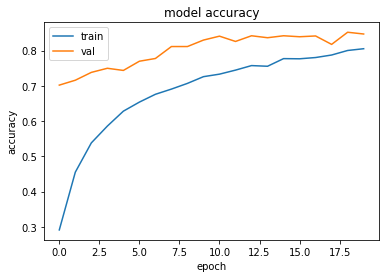

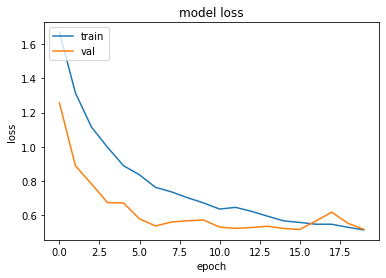

In [118]:
# Training Our Model
history = model.fit( train_images, train_labels, epochs=20, batch_size = 64, validation_split=0.3)
training_graph(history)

In [119]:
# evaluate the model
_, train_acc = model.evaluate(train_images, train_labels)
_, test_acc = model.evaluate(test_images, test_labels)
predictions = model.predict(test_images)
print('Train Accuracy : %.3f, Test Accuracy: %.3f' % (train_acc, test_acc))

57/57 [==============================] - 5s 81ms/step - loss: 0.4957 - accuracy: 0.8500
Train Accuracy : 0.908, Test Accuracy: 0.850


### *We are getting an accuracy of 85 percent accuracy on test set with pretrained vgg16 eventhough we increased dropout values by 20% so that our model generalizes better rather than overfit*

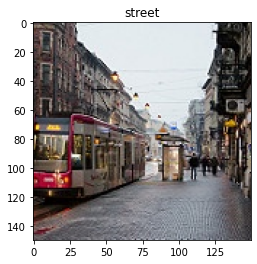

In [122]:
# Visualising Model Predictions on random image 
def random_image_predictor(images, labels, classes):
  ind = random.randint(0, len(labels))
  plt.imshow(images[ind])
  plt.title(classes[np.argmax(labels[ind])])

random_image_predictor(test_images, predictions, classes)